In [1]:
%%capture captured_output
#captured_output.show()

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [21]:
import pandas as pd

sample_submission = pd.read_csv('gdrive/MyDrive/llm/income/sample_submission.csv')
train = pd.read_csv('gdrive/MyDrive/llm/income/train.csv')
test = pd.read_csv('gdrive/MyDrive/llm/income/test.csv')

In [22]:
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Scotland,England,Single,0,0,0,Under Median,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

For an effective EDA before diving into preprocessing, here are some steps you might consider based on the train.info() output you've shared:

1. Check for Missing Values
Although train.info() shows no nulls, it's good to confirm there are no missing values represented in other forms (e.g., as "?", "N/A", or empty strings).

2. Summary Statistics
Obtain summary statistics for numerical columns (Age, Working_Week (Yearly), Gains, Losses, Dividends, Income) using .describe(). This can reveal outliers, the distribution of the data, and potential skewness.

3. Value Counts for Categorical Features
For categorical columns, explore the distribution of values using .value_counts(). This can help identify if there are any categories that are overly dominant or rare, which might impact model performance or indicate data imbalances.

4. Distribution of Target Variable (Income)
Analyzing the distribution of the Income variable can provide insights into the range and skewness of income values. Consider plotting a histogram or a boxplot.

5. Correlation Analysis
For numerical features, it's useful to check the correlation between them and with the target variable (Income). This can be achieved using .corr() and visualized through a heatmap.

6. Explore Relationships Between Features and Target Variable
Investigate how different features relate to the target variable. For example:

Plotting Age against Income to see if there's a trend indicating that income increases with age.
Grouping data by categorical features like Education_Status or Employment_Status and comparing average Income across groups.
7. Identify Potential Data Quality Issues
Look for inconsistencies or anomalies in the data, such as:

Unusual values in Working_Week (Yearly) (e.g., extremely high or low numbers that don’t make sense).
Consistency in categorical data, such as Gender, Education_Status, or Employment_Status.
Requested Actions Based on the Above Steps:
Missing Values: Check and confirm the actual missing values for each column.
Summary Statistics: Provide summary statistics for numerical columns.
Value Counts: Share value counts for a couple of categorical features, especially those you suspect might have imbalanced classes (e.g., Education_Status, Employment_Status).
Distribution of Income: Describe the distribution of the Income variable.
Correlation Analysis: Conduct and describe a basic correlation analysis between numerical features.
Feature-Target Relationship Exploration: Share any plots or statistics that show the relationship between key features (e.g., Age, Education_Status) and the target variable (Income).
Data Quality Checks: Highlight any unusual or notable findings in the data that might need addressing during preprocessing.
Once you provide the results or observations for these steps, we can move forward with tailored preprocessing strategies based on the insights gathered from your EDA.

- Check for Missing Values

Although train.info() shows no nulls, it's good to confirm there are no missing values represented in other forms (e.g., as "?", "N/A", or empty strings).

In [28]:
import pandas as pd

# Define potential representations of missing values
missing_values = ["?", "N/A", ""]

# Assuming 'train' is your DataFrame

# Separate the columns by dtype
categorical_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to hold counts and percentages of missing/zero values for each column
missing_zero_counts = {}

# Calculate counts and percentages for categorical columns
for col in categorical_cols:
    count = sum(train[col].isin(missing_values))
    pct = (count / len(train)) * 100
    missing_zero_counts[col] = f"{count}({pct:.2f}%)"

# Calculate counts and percentages for numerical columns
for col in numerical_cols:
    count = sum(train[col] == 0)
    pct = (count / len(train)) * 100
    missing_zero_counts[col] = f"{count}({pct:.2f}%)"

# Output the results
print("Categorical variables:\n", "\n".join(categorical_cols), "\n")
print("Numerical variables:\n", "\n".join(numerical_cols), "\n")
print("Counts and percentages of 0 or missing values per variable:")
for col, count_pct in missing_zero_counts.items():
    print(f"{col}: {count_pct}")


Categorical variables:
 ID
Gender
Education_Status
Employment_Status
Industry_Status
Occupation_Status
Race
Hispanic_Origin
Martial_Status
Household_Status
Household_Summary
Citizenship
Birth_Country
Birth_Country (Father)
Birth_Country (Mother)
Tax_Status
Income_Status 

Numerical variables:
 Age
Working_Week (Yearly)
Gains
Losses
Dividends
Income 

Counts and percentages of 0 or missing values per variable:
ID: 0(0.00%)
Gender: 0(0.00%)
Education_Status: 0(0.00%)
Employment_Status: 0(0.00%)
Industry_Status: 0(0.00%)
Occupation_Status: 0(0.00%)
Race: 0(0.00%)
Hispanic_Origin: 0(0.00%)
Martial_Status: 0(0.00%)
Household_Status: 0(0.00%)
Household_Summary: 0(0.00%)
Citizenship: 0(0.00%)
Birth_Country: 0(0.00%)
Birth_Country (Father): 0(0.00%)
Birth_Country (Mother): 0(0.00%)
Tax_Status: 0(0.00%)
Income_Status: 0(0.00%)
Age: 145(0.73%)
Working_Week (Yearly): 4720(23.60%)
Gains: 19217(96.08%)
Losses: 19568(97.84%)
Dividends: 17928(89.64%)
Income: 8697(43.48%)


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10000 non-null  object
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Status        10000 non-null  object
 4   Employment_Status       10000 non-null  object
 5   Working_Week (Yearly)   10000 non-null  int64 
 6   Industry_Status         10000 non-null  object
 7   Occupation_Status       10000 non-null  object
 8   Race                    10000 non-null  object
 9   Hispanic_Origin         10000 non-null  object
 10  Martial_Status          10000 non-null  object
 11  Household_Status        9999 non-null   object
 12  Household_Summary       10000 non-null  object
 13  Citizenship             10000 non-null  object
 14  Birth_Country           10000 non-null  object
 15  Bir

# 1. EDA

In [23]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [17]:
# 범주형 칼럼만 선택
categorical_columns = train.select_dtypes(include=['object'])

# 각 범주형 칼럼에 대한 value_counts() 실행
for column in categorical_columns:
    print(f'Value counts for {column}:')
    print(train[column].value_counts())
    print('\n')

Value counts for ID:
TRAIN_00000    1
TRAIN_13330    1
TRAIN_13337    1
TRAIN_13336    1
TRAIN_13335    1
              ..
TRAIN_06666    1
TRAIN_06665    1
TRAIN_06664    1
TRAIN_06663    1
TRAIN_19999    1
Name: ID, Length: 20000, dtype: int64


Value counts for Gender:
F    10472
M     9528
Name: Gender, dtype: int64


Value counts for Education_Status:
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten     

<ipython-input-19-8bf45c773401>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


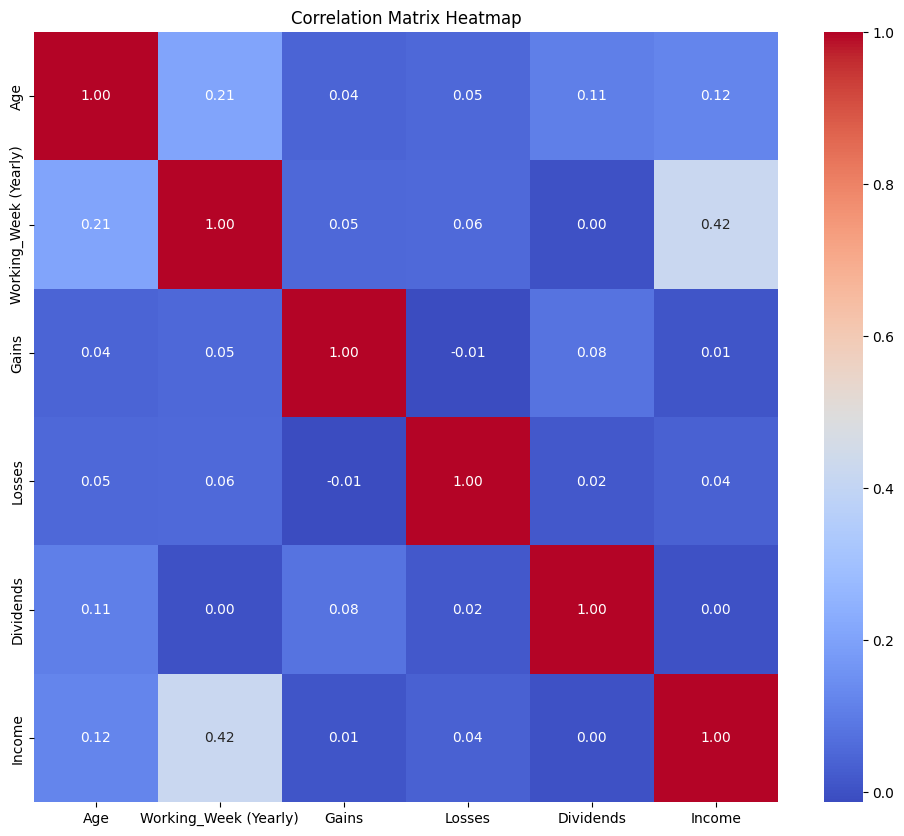

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame

# Calculating correlation matrix
corr_matrix = train.corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


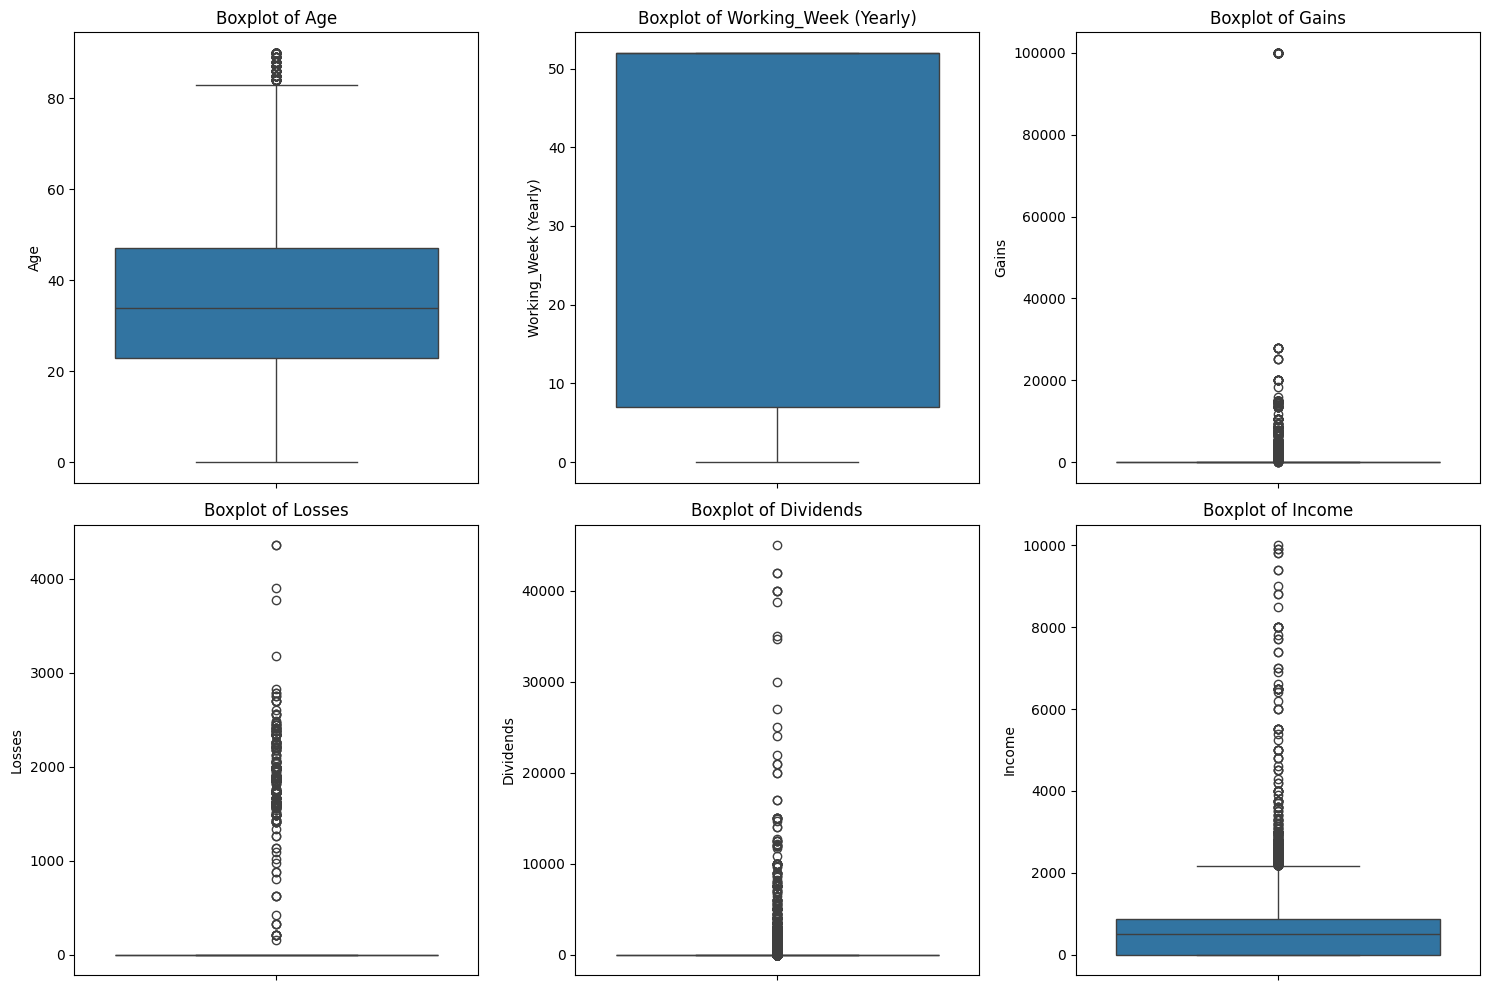

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame and it contains numerical columns as identified by train.describe()
numerical_columns = train.describe().columns

# Set up the matplotlib figure size and grid for subplots
plt.figure(figsize=(15, 10))

# Number of rows/columns in the subplot grid
n_rows = len(numerical_columns) // 3 + (len(numerical_columns) % 3 > 0)
n_cols = 3

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=train[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

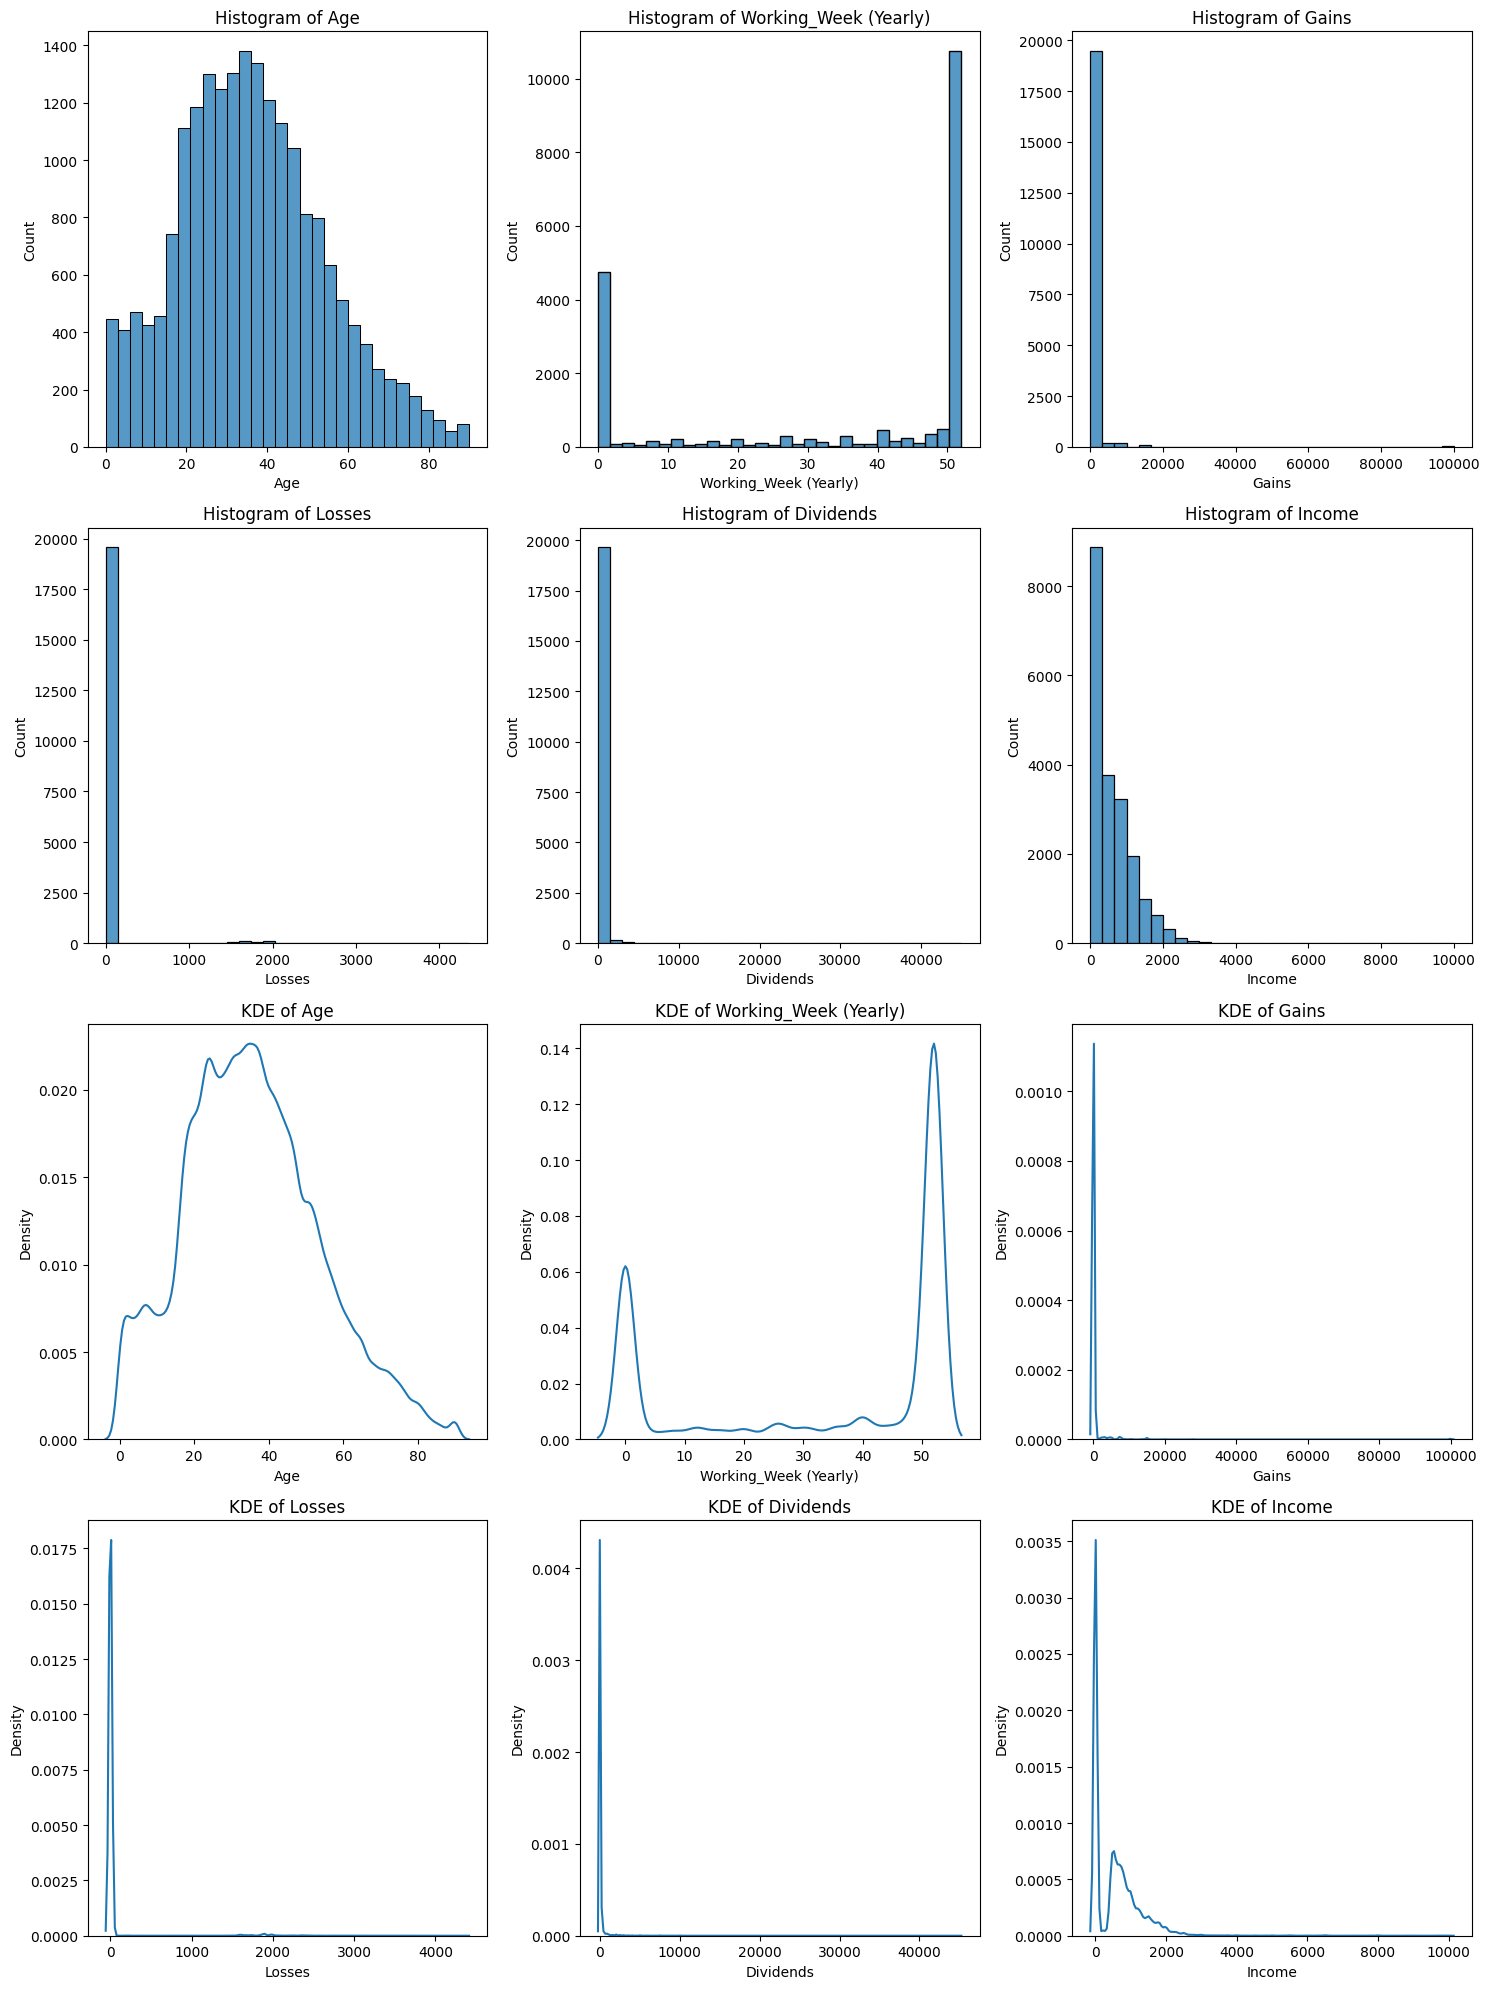

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'train' is your DataFrame
# Identify numerical columns by selecting those with dtype 'int64' or 'float64'
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Determine the layout of the subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_columns) * 2 + n_cols - 1) // n_cols  # Calculate rows needed, times 2 for histogram and KDE plots for each column

plt.figure(figsize=(15, 5 * n_rows))  # Adjust the figure size as needed

# Loop through the numerical columns to create subplots for histograms
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(train[column], bins=30, kde=False)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

# Loop through the numerical columns again to create subplots for KDE plots
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, len(numerical_columns) + i + 1)  # Offset by the number of numerical columns to start a new row
    sns.kdeplot(train[column], bw_adjust=0.5)
    plt.title(f'KDE of {column}')
    plt.tight_layout()

plt.show()

# [1] 기본 전처리

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 데이터셋 'train'을 로드합니다.
# train = pd.read_csv('path_to_your_data.csv')

# 타겟 변수 'Income'을 분리합니다.
y = train['Income']
X = train.drop(columns=['Income', 'ID'])  # 'ID' 열은 예측에 불필요하므로 제거합니다.

# 카테고리형 변수와 수치형 변수를 식별합니다.
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 범주형 변수에 대한 변환기를 만듭니다.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # 결측치를 'missing'으로 대체합니다.
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # 원-핫 인코딩을 수행합니다.
])

# 수치형 변수에 대한 변환기를 만듭니다.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 결측치를 중앙값으로 대체합니다.
    ('scaler', StandardScaler())  # 데이터를 표준화합니다.
])

# 전처리를 위한 컬럼 변환기를 만듭니다.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 전처리 파이프라인을 피팅합니다.
X_processed = preprocessor.fit_transform(X)


# [2] 학습, 평가

In [60]:
from sklearn.model_selection import KFold
from sklearn.base import clone
import numpy as np

def train_model(model, X, y, cv):
    """
    모델을 교차 검증을 통해 학습하는 함수.

    Parameters:
    model: 학습할 모델 객체.
    X: 피처 데이터셋.
    y: 타겟 변수.
    cv: 교차 검증 분할기 (예: KFold 객체).

    Returns:
    trained_models: 각 폴드에서 학습된 모델의 리스트.
    """
    trained_models = []
    for train_index, test_index in cv.split(X):
        # 데이터 분할
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 모델 복제 및 학습
        cloned_model = clone(model)
        cloned_model.fit(X_train, y_train)

        # 학습된 모델 저장
        trained_models.append(cloned_model)

    return trained_models

def evaluate_model(trained_models, X, y, cv):
    """
    학습된 모델들을 평가하는 함수.

    Parameters:
    trained_models: 학습된 모델 객체의 리스트.
    X: 피처 데이터셋.
    y: 타겟 변수.
    cv: 교차 검증 분할기 (예: KFold 객체).

    Returns:
    rmse_scores: 각 폴드의 RMSE 점수.
    """
    rmse_scores = []
    for i, (train_index, test_index) in enumerate(cv.split(X)):
        # 데이터 분할
        X_test = X[test_index]
        y_test = y[test_index]

        # 예측 및 평가
        y_pred = trained_models[i].predict(X_test)
        mse = np.mean((y_pred - y_test) ** 2)
        rmse_scores.append(np.sqrt(mse))

    return rmse_scores


In [38]:
!pip install xgboost lightgbm

In [61]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 초기화
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)

# 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 전처리된 데이터(X_processed)와 타겟 변수(y)를 NumPy 배열로 변환 (필요한 경우)
# X_processed_np = X_processed.toarray() if not isinstance(X_processed, np.ndarray) else X_processed

# XGBoost 모델 학습 및 평가
xgb_trained_models = train_model(xgb_model, X_processed, y, kf)
xgb_rmse_scores = evaluate_model(xgb_trained_models, X_processed, y, kf)
print("XGBoost RMSE scores:", xgb_rmse_scores)
print("Mean RMSE for XGBoost:", np.mean(xgb_rmse_scores))

# LightGBM 모델 학습 및 평가
lgb_trained_models = train_model(lgb_model, X_processed, y, kf)
lgb_rmse_scores = evaluate_model(lgb_trained_models, X_processed, y, kf)
print("LightGBM RMSE scores:", lgb_rmse_scores)
print("Mean RMSE for LightGBM:", np.mean(lgb_rmse_scores))

XGBoost RMSE scores: [620.6915860225803, 613.6726316978826, 608.5640435180675, 641.5734131238856, 609.3640294005435]
Mean RMSE for XGBoost: 618.7731407525919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 215
[LightGBM] [Info] Start training from score 556.153500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 214
[LightGBM] [Info] Start training from score 555.873750
[LightGBM] [Info] Auto-cho

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10000 non-null  object
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Status        10000 non-null  object
 4   Employment_Status       10000 non-null  object
 5   Working_Week (Yearly)   10000 non-null  int64 
 6   Industry_Status         10000 non-null  object
 7   Occupation_Status       10000 non-null  object
 8   Race                    10000 non-null  object
 9   Hispanic_Origin         10000 non-null  object
 10  Martial_Status          10000 non-null  object
 11  Household_Status        9999 non-null   object
 12  Household_Summary       10000 non-null  object
 13  Citizenship             10000 non-null  object
 14  Birth_Country           10000 non-null  object
 15  Bir

# [3] 추론

In [62]:
# 'test' 데이터 로드 (예시)
# test = pd.read_csv('path_to_your_test_data.csv')

# 'Household_Status' 열의 결측치 처리를 위해 이미 설정한 전처리 파이프라인을 사용
X_test = preprocessor.transform(test.drop(columns=['ID']))

# 가장 성능이 좋았던 모델을 선택하여 예측을 수행 (예: XGBoost 모델 사용)
# 예시에서는 train_model 함수에서 반환된 마지막 trained_models 중 하나를 사용
# 실제 사용 시에는 특정 기준(예: 검증 세트에서의 성능)에 따라 모델을 선택
best_model = xgb_trained_models[-1]  # 이 예시에서는 단순히 마지막 훈련 모델을 사용
y_pred_test = best_model.predict(X_test)

# 예측 결과를 DataFrame으로 생성
predictions = pd.DataFrame({
    'ID': test['ID'],
    'Income': y_pred_test
})

# 예측 결과 출력 또는 파일로 저장
print(predictions.head())  # 첫 5개의 예측값 확인
# predictions.to_csv('path_to_save_predictions.csv', index=False)  # 파일로 저장


          ID      Income
0  TEST_0000    3.950726
1  TEST_0001  -57.180595
2  TEST_0002  400.000519
3  TEST_0003  665.307922
4  TEST_0004   12.897800


In [63]:
predictions.to_csv('gdrive/MyDrive/llm/income/result/result_00.csv', index=False)